Выбрать на kaggle.com датасет с неразмеченными данными.

Перевести все значения признаков в числа и шкалировать.

Произвести кластеризацию по методу k-средних на оптимальное для этого датасета число кластеров.

Произвести восходящую кластеризацию. 

Сравнить результаты


In [4]:
"""Imports"""

import csv
from dsmltf import scale, KMeans, squared_errors, bottom_up_cluster, generate_clusters, get_values
import matplotlib.pyplot as plt

def make_data() -> list:
    """
    make data:D
    """
    # Парсим данные
    with open("anime_filtered.csv", "r+", encoding="UTF-8") as f:
        data = []
        a = {
            "OVA": 0,
            "Movie": 1,
            "TV": 2,
            "Unknown": 3,
            "Music": 4,
            "Special": 5,
            "ONA": 6,
        }
        b = {
            "Picture book": 0,
            "4-koma manga": 1,
            "Visual novel": 2,
            "Unknown": 3,
            "Original": 4,
            "Radio": 5,
            "Music": 6,
            "Web manga": 7,
            "Digital manga": 8,
            "Novel": 9,
            "Other": 10,
            "Card game": 11,
            "Light novel": 12,
            "Game": 13,
            "Book": 14,
            "Manga": 15,
        }
        for i in csv.reader(f):
            data.append(i[6:9] + i[15:16])
        for i in range(1, len(data)):
            data[i][0] = a[data[i][0]]
            data[i][1] = b[data[i][1]]
            data[i][2] = int(data[i][2])
            data[i][3] = float(data[i][3])
    return data[1:]
 

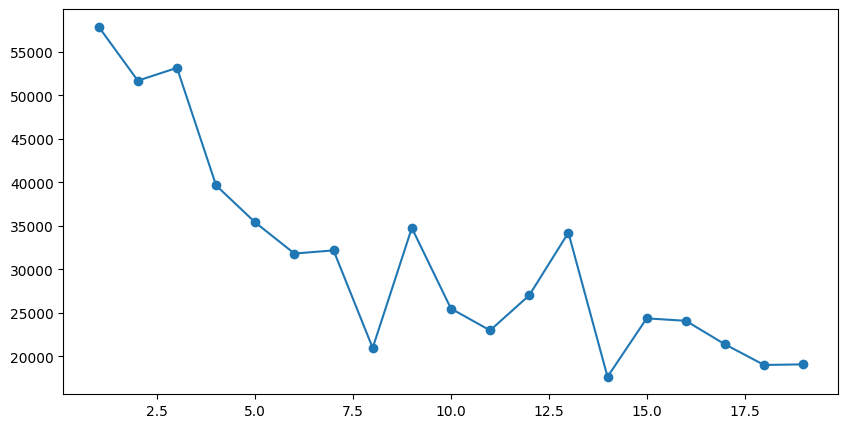

In [5]:
# Получим датасет
data_set = make_data()
scale_data = scale(data_set)  # Прошкалируем
    # for k in range(1, 20):
    #     x.append(k)
    #     y.append(squared_errors(scale_data, k))
    # print(x)
    # print(y)
    # ТАК КАК ЭТО ВСЕ ОООООООООООООООООООЧЕНЬ ДОЛГО СЧИТАЕТСЯ, Я ПОСЧИТАЛ ЭТО ЕДИНОЖДЫ И ЗАБИЛ
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
y = [57896.000000003936, 51702.23198705394, 53175.59520065099, 39656.95205021339, 35402.30937623373, 31833.63272415173, 32194.497474095657, 20982.865441627753, 34773.875555854975, 25504.478614565964, 22998.68685581437, 27033.230896412908, 34229.717005210856, 17668.42718598385, 24382.735571132063, 24101.939550355844, 21399.578615090282, 19026.173280587314, 19094.39252915013]
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='', marker='o')
plt.show()

In [6]:
def main() -> None:
    """main function"""
    # Получим датасет
    data_set = make_data()
    scale_data = scale(data_set[:100])  # Прошкалируем
    clast = KMeans(8) # Устанавливаем число кластеров
    clast.train(scale_data) # Тренируем?
    print(clast.means)
    # восходящая кластеризация
    base_claster = bottom_up_cluster(scale_data)
    print([get_values(cluster) for cluster in generate_clusters(base_claster, 8)])

if __name__ == "__main__":
    main()

[[0.07202289412102104, -1.2703147625216862, -0.3487582933922146, -0.48516635648589657], [-0.0949867154349696, 0.2728352933906943, -0.07361482746678745, 0.4348763782402176], [-1.5563207990498877, 0.8296420145961926, -0.4341772477122771, -0.006519071254069359], [-0.0949867154349696, 0.8296420145961926, 0.6925803155548781, 0.8762718277345051], [-0.0949867154349696, 0.8296420145961926, -0.08863826164368285, 0.8491090308425483], [-0.0949867154349696, 0.8296420145961926, -0.08863826164368285, 1.107155601316132], [-0.0949867154349696, 0.8296420145961926, 0.30197102695559763, -0.12196095804488291], [-0.0949867154349696, 0.8296420145961926, 2.044689391475464, 0.5842717611459768]]


TypeError: bottom_up_cluster.<locals>.<lambda>() missing 1 required positional argument: 'y'